### Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.api as sm
import numpy as np

### Загрузка данных

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Описание данных

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Гистограммы

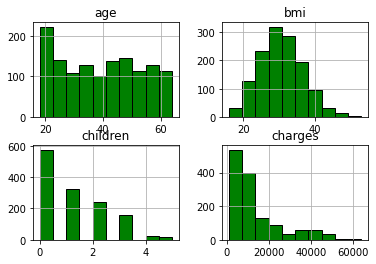

In [4]:
data.hist(edgecolor='black', color='green')
plt.show()

### Меры центральной тенденции и меры разброса для столбцов charges и charges

In [5]:
# bmi
bmi_mean = np.mean(data['bmi'])
bmi_moda = sts.mode(data['bmi'])[0][0]
bmi_med = np.median(data['bmi'])

bmi_std = data['bmi'].std()
bmi_raz = data['bmi'].max() - data['bmi'].min()
bmi_q1 = np.percentile(data['bmi'], 25, interpolation='midpoint')
bmi_q3 = np.percentile(data['bmi'], 75, interpolation='midpoint')
bmi_iqr1 = bmi_q3 - bmi_q1
bmi_iqr2 = sts.iqr(data['bmi'], interpolation='midpoint')

# charges
charges_mean = np.mean(data['charges'])
charges_moda = sts.mode(data['charges'])[0][0]
charges_med = np.median(data['charges'])

charges_std = data['charges'].std()
charges_raz = data['charges'].max() - data['charges'].min()
charges_q1 = np.percentile(data['charges'], 25, interpolation='midpoint')
charges_q3 = np.percentile(data['charges'], 75, interpolation='midpoint')
charges_iqr1 = charges_q3 - charges_q1
charges_iqr2 = sts.iqr(data['charges'], interpolation='midpoint')

print('Для индека массы тела:')
print(f'Среднее: {round(bmi_mean, 2)}, мода: {round(bmi_moda, 2)}, медиана: {round(bmi_med, 2)}')
print(f'Стандартное отклонение: {round(bmi_std, 2)}, размах: {round(bmi_raz, 2)},\nмежквартальный размах Q1-Q3: {round(bmi_iqr1, 2)} (scipy: {round(bmi_iqr2, 2)})')

print('\nДля расходов:')
print(f'Среднее: {round(charges_mean, 2)}, мода: {round(charges_moda, 2)}, медиана: {round(charges_med, 2)}')
print(f'Стандартное отклонение: {round(charges_std, 2)}, размах: {round(charges_raz, 2)},\nмежквартальный размах Q1-Q3: {round(charges_iqr1, 2)} (scipy: {round(charges_iqr2, 2)})')

Для индека массы тела:
Среднее: 30.66, мода: 32.3, медиана: 30.4
Стандартное отклонение: 6.1, размах: 37.17,
межквартальный размах Q1-Q3: 8.38 (scipy: 8.38)

Для расходов:
Среднее: 13270.42, мода: 1639.56, медиана: 9382.03
Стандартное отклонение: 12110.01, размах: 62648.55,
межквартальный размах Q1-Q3: 11879.8 (scipy: 11879.8)


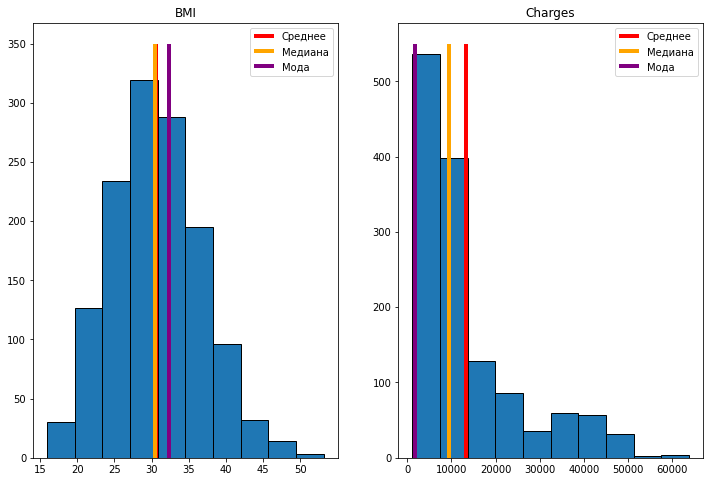

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
labels = ['Среднее', 'Медиана', 'Мода']
LINEWIDTH = 4
ax[0].hist(data['bmi'], edgecolor='black')
ax[0].vlines(bmi_mean, 0, 350, colors='red', label=labels[0], linewidth=LINEWIDTH)
ax[0].vlines(bmi_med, 0, 350, colors='orange', label=labels[1], linewidth=LINEWIDTH)
ax[0].vlines(bmi_moda, 0, 350, colors='purple', label=labels[1], linewidth=LINEWIDTH)
ax[0].set_title('BMI')
ax[0].legend(labels)

ax[1].hist(data['charges'], edgecolor='black')
ax[1].vlines(charges_mean, 0, 550, colors='red', label=labels[0], linewidth=LINEWIDTH)
ax[1].vlines(charges_med, 0, 550, colors='orange', label=labels[1], linewidth=LINEWIDTH)
ax[1].vlines(charges_moda, 0, 550, colors='purple', label=labels[1], linewidth=LINEWIDTH)
ax[1].set_title('Charges')
ax[1].legend(labels)
plt.show()

### Построение боксплотов

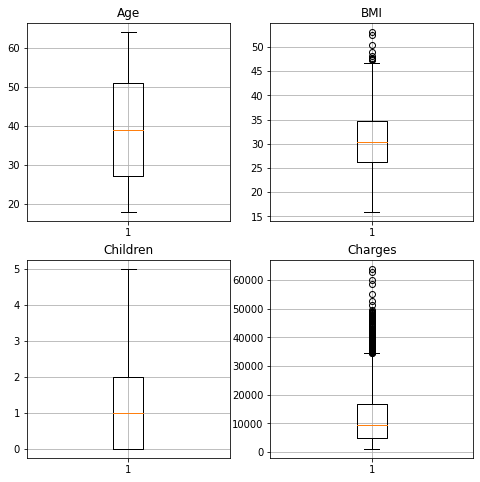

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0][0].boxplot(data['age'])
ax[0][0].set_title('Age')
ax[0][0].grid()
ax[0][1].boxplot(data['bmi'])
ax[0][1].set_title('BMI')
ax[0][1].grid()
ax[1][0].boxplot(data['children'])
ax[1][0].set_title('Children')
ax[1][0].grid()
ax[1][1].boxplot(data['charges'])
ax[1][1].set_title('Charges')
ax[1][1].grid()
plt.show()

### Центральная предельная теорема

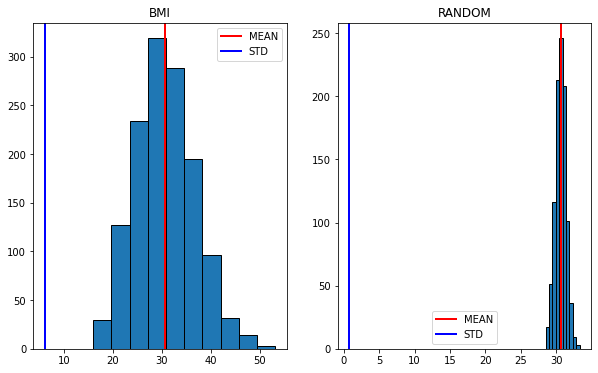

In [8]:
stds = list()  # массив std
means = list()  # массив mean
for i in range(300):
    v = np.random.choice(a=data['bmi'], size=np.random.randint(10, 100, 1))
    stds.append(v.std())
    means.append(v.mean())

result_mean = np.asarray(means).mean()
result_std = np.asarray(stds).std()
sample = sts.norm(loc=result_mean, scale=result_std).rvs(size=1000)

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(121)
ax.set_title('BMI')
ax.hist(data['bmi'], edgecolor='black')
ax.axvline(x=data['bmi'].mean(), color='red', linewidth=2, label='MEAN')
ax.axvline(x=data['bmi'].std(), color='blue', linewidth=2, label='STD')
ax.legend()

ax = fig.add_subplot(122)
ax.set_title('RANDOM')
ax.hist(sample, edgecolor='black')
ax.axvline(x=result_mean, color='red', linewidth=2, label='MEAN')
ax.axvline(x=result_std, color='blue', linewidth=2, label='STD')
ax.legend()

plt.show()

### Доверительные интервалы

In [9]:
def get_interval(d, title):
    mean = d.mean()
    se = d.std() / (len(d))**0.5
    i_l_95 = mean - 1.96 * se
    i_r_95 = mean + 1.96 * se
    i_l_99 = mean - 2.58 * se
    i_r_99 = mean + 2.58 * se

    print(title)
    print("Доверительный интервал: 0.95\n\tc использованием scipy: ", sts.norm.interval(alpha=0.95, loc=mean, scale=sts.sem(d)))
    print(f"\t({i_l_95} <= {mean} <= {i_r_95})")
    print("Доверительный интервал: 0.99\n\tc использованием scipy: ", sts.norm.interval(alpha=0.99, loc=mean, scale=sts.sem(d)))
    print(f"\t({i_l_99} <= {mean} <= {i_r_99})")



get_interval(data['bmi'], 'BMI')
get_interval(data['charges'], 'CHARGES')

BMI
Доверительный интервал: 0.95
	c использованием scipy:  (30.336642971534822, 30.990150750438275)
	(30.336636967245095 <= 30.66339686098655 <= 30.990156754728)
Доверительный интервал: 0.99
	c использованием scipy:  (30.233969458168303, 31.092824263804793)
	(30.233274143714635 <= 30.66339686098655 <= 31.093519578258462)
CHARGES
Доверительный интервал: 0.95
	c использованием scipy:  (12621.54197822916, 13919.302552053354)
	(12621.530054682518 <= 13270.422265141257 <= 13919.314475599995)
Доверительный интервал: 0.99
	c использованием scipy:  (12417.649014863586, 14123.195515418927)
	(12416.268233006796 <= 13270.422265141257 <= 14124.576297275717)


### Проверка распределения признаков на нормальность

KS-тесты
BMI
KstestResult(statistic=0.02613962682509635, pvalue=0.31453976932347394)
p-значение больше 0.05, следовательно нулевая гипотеза принимается и выборка имеет нормальное распредееление

CHARGES
KstestResult(statistic=0.18846204110424236, pvalue=4.39305730768502e-42)
p-значение намного меньше 0.05, следовательно нулевая гипотеза отвергается и выборка НЕ имеет нормального распредееления


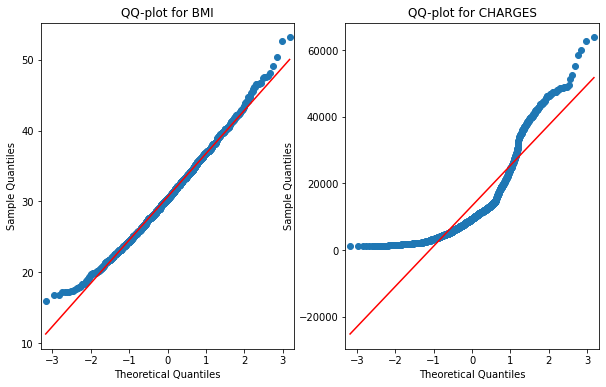

In [10]:
print("KS-тесты")
print("BMI")
bmi_ks_test = sts.kstest((data['bmi'] - np.mean(data['bmi'])) / np.std(data['bmi']), 'norm')
print(bmi_ks_test)
print("p-значение больше 0.05, следовательно нулевая гипотеза принимается и выборка имеет нормальное распредееление")
print("\nCHARGES")
charges_ks_test = sts.kstest((data['charges'] - np.mean(data['charges'])) / np.std(data['charges']), 'norm')
print(charges_ks_test)
print("p-значение намного меньше 0.05, следовательно нулевая гипотеза отвергается и выборка НЕ имеет нормального распредееления")


# Вывод результатов на графики
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(121)
ax.set_title(f'QQ-plot for BMI')
sm.qqplot(data['bmi'], line='s', ax=ax)

ax = fig.add_subplot(122)
ax.set_title(f'QQ-plot for CHARGES')
sm.qqplot(data['charges'], line='s', ax=ax)

plt.show()